# ACM 158 PS3 PROBLEM 2
Eduardo Beltrame

In [4]:
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd
from patsy import dmatrices
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
from matplotlib.ticker import MaxNLocator


In [5]:
df = pd.read_csv('dataset5.csv')

In [6]:
df

,X1,X2,Y
0,0.852677,0.289277,0.763951
1,0.362499,0.373333,2.176286
2,-0.626204,0.562130,2.081236
3,-0.241528,0.418334,-0.348059
4,-1.892076,-0.653932,-0.562755
...,...,...,...
195,0.067945,-1.013978,0.487769
196,0.022669,0.082966,1.430228
197,0.201935,-1.256165,0.785857
198,-0.900569,0.090771,-0.319796


### These are the 3 models we want to compare. We use the patsy python library to convert their model description into a design matrix: https://patsy.readthedocs.io/en/latest/

$$ f_1(X) = \beta_0 + \beta_1 X_1 + \beta_2 X_2 $$
$$ f_2(X) = \beta_0 + \beta_1 X_1 + \beta_2 \sin(X_2) $$
$$ f_3(X) = \beta_0 + \beta_1 X_1 $$


In [7]:
y1, X1 = dmatrices('Y ~ X1 + X2', data=df, return_type='dataframe')
y2, X2 = dmatrices('Y ~ X1 + np.sin(X2)', data=df, return_type='dataframe')
y3, X3 = dmatrices('Y ~ X1', data=df, return_type='dataframe')

### To do the leave one out cross validation, we fit each model 200 times, leaving a single sample out.

In [11]:
train_idx

array([], dtype=int64)

In [22]:
idx = list(range(200))
train_idx=idx.remove(r)
train_idx

In [15]:
indices.remove(0)

In [35]:

results = pd.DataFrame()
modelnum = 0
for _X, _y in zip([X1, X2, X3], [y1, y2, y3]):
    modelnum+=1

    error_list = []
    for r in range(200):
        # this creates a random shuffling of an array with 200 indices.
        train_idx = list(range(200))
        train_idx.remove(r)
        test_idx=[r]

        mod = sm.OLS(_y.loc[train_idx], _X.loc[train_idx]) 
        res = mod.fit()
    #     display(res.summary())

        test_prediction = res.predict(_X.loc[test_idx])

        error =  test_prediction - _y.loc[test_idx]['Y']
        error_list.append(error.values[0])
        
    results['error_model'+str(modelnum)]=error_list

In [36]:
results

,error_model1,error_model2,error_model3
0,1.260700,1.340652,1.028711
1,-0.527936,-0.434283,-0.830609
2,-1.151740,-1.036328,-1.616279
3,1.515619,1.615612,1.171009
4,-0.678488,-0.822861,-0.081073
...,...,...,...
195,-0.291787,-0.383435,0.605381
196,-0.329409,-0.307455,-0.382030
197,-0.689209,-0.684699,0.424858
198,0.619747,0.638340,0.559543


# Plot results, average, and error bars for 1 standard deviation
Wow, from LOOCV it seems that all models are exactly equivalent. Looking at this alone, it would seem that model 3 would be the best one to use, because it is the simplest. However, due to the results from the previous question, I'd go with model 1, which is not terribly more complicated.

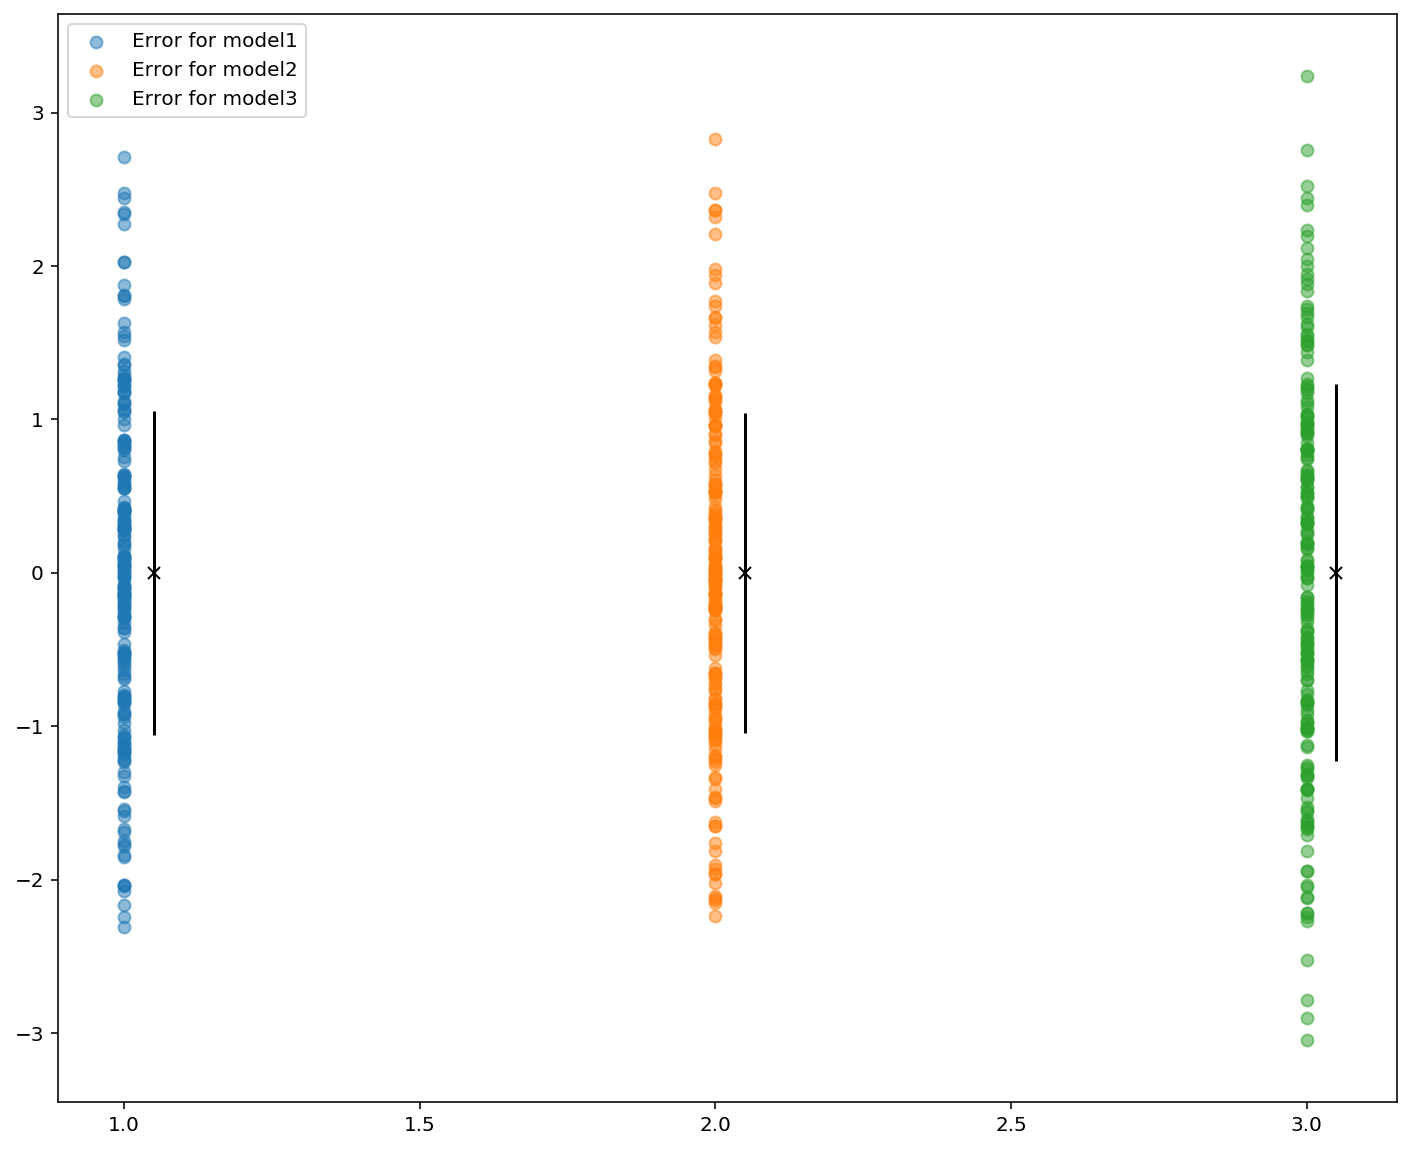

In [37]:
i = 1
for col in results.columns:

    plt.scatter(len(results[col])*[i], results[col], label = 'LOOCV Error for model' + str(i), alpha = 0.5)
    plt.errorbar(x=i+0.05, y=np.mean(results[col]), yerr=results[col].std(), fmt='-x', color = 'k')

   
    i = i+1

plt.legend()
fig = plt.gcf()
fig.set_size_inches(12, 10)

plt.show()